<a href="https://colab.research.google.com/github/uzair011/ML---learning.../blob/main/ML_MagicGamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### dataset
Source:

Original Owner:

R. K. Bock
Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope
rkb '@' mail.cern.ch

Donor:

P. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz



In [8]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [9]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [10]:
df["fM3Long"]

0         22.0110
1         23.8238
2        -64.8580
3         -6.4633
4         28.5525
           ...   
19015     11.5245
19016     13.1853
19017     41.0562
19018    -93.5224
19019   -168.4558
Name: fM3Long, Length: 19020, dtype: float64

In [11]:
df["fM3Long"].unique()

array([  22.011 ,   23.8238,  -64.858 , ...,   41.0562,  -93.5224,
       -168.4558])

In [12]:
df["class"] = (df["class"] == "g").astype(int)

In [13]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


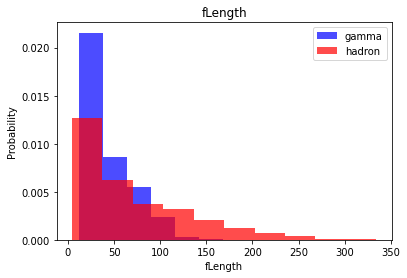

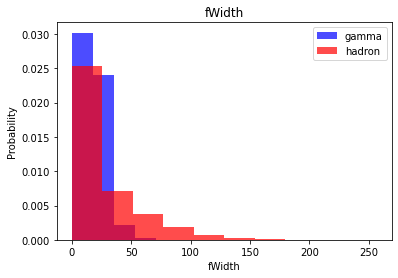

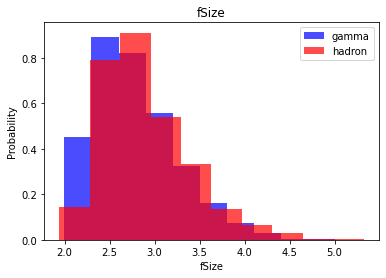

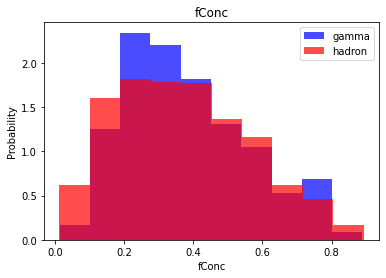

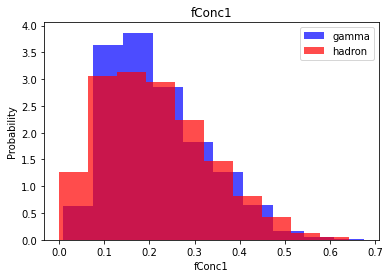

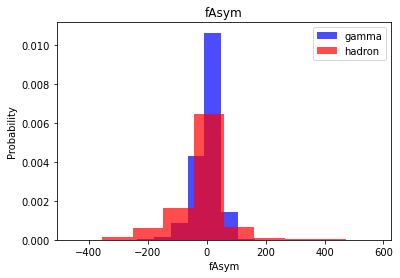

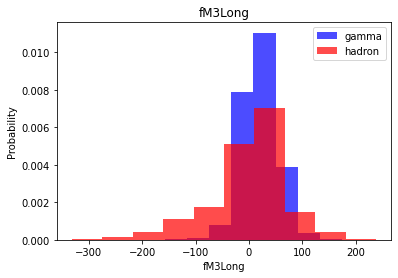

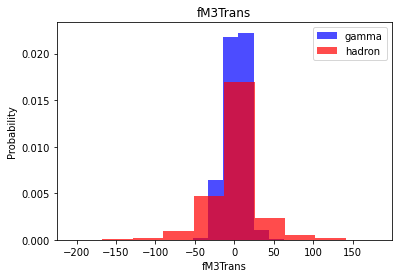

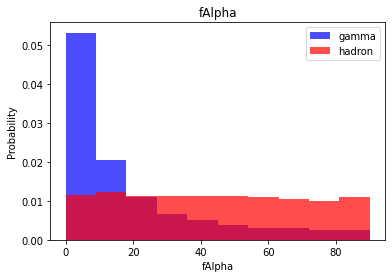

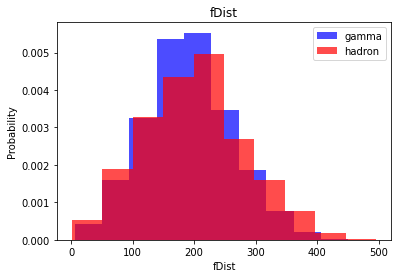

In [14]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [15]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


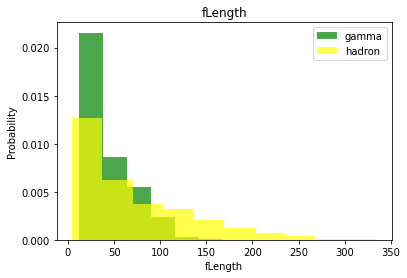

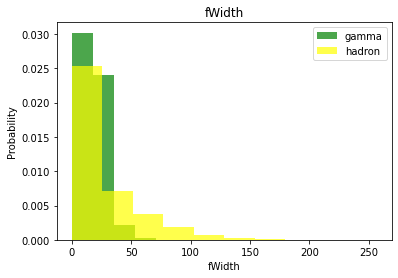

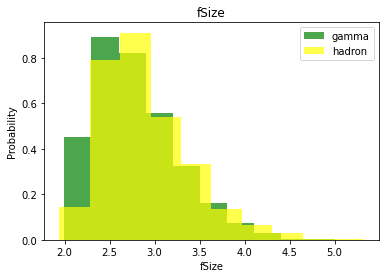

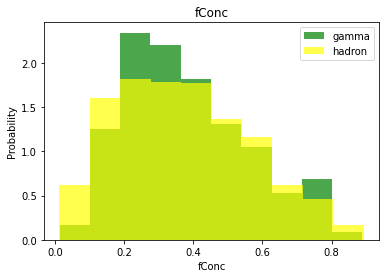

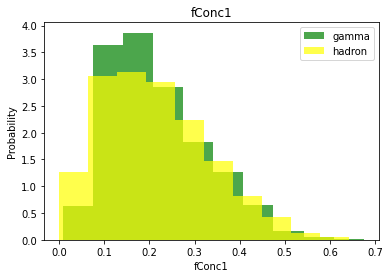

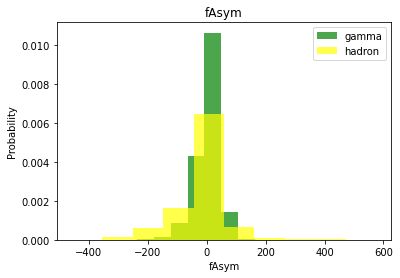

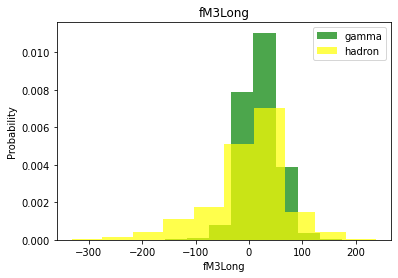

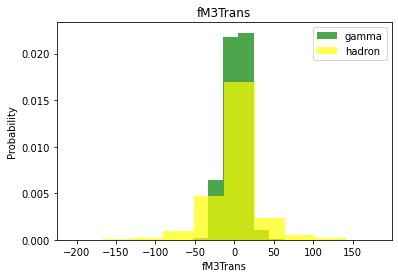

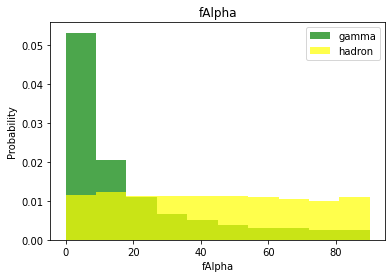

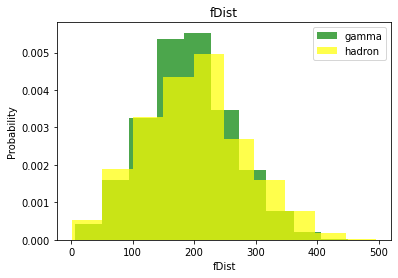

In [16]:
# visualization...
for label in cols[:-1]:
  plt.hist(df[df["class"] ==1] [label], color="green", label="gamma", alpha=0.7, density=True )
  plt.hist(df[df["class"] ==0] [label], color="yellow", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend() ##
  plt.show()

 ### Train, Validation, Test validation


In [45]:
train, validation, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))] )

In [46]:
print("train gamma: ", len(train [train["class"] == 1] ))
print("train hadron: ", len(train [train["class"] == 0] ))

print("validation gamma: ", len(validation [validation["class"] == 1]))
print("validation hardon: ", len(validation [validation["class"] == 0]))

print("test gamma: ", len(test [test["class"] == 1] ))
print("test hardon: ", len(test [test["class"] == 0]))

train gamma:  7443
train hadron:  3969
validation gamma:  2458
validation hardon:  1346
test gamma:  2431
test hardon:  1373


In [49]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns [:-1]].values
  y = dataframe[dataframe.columns [-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # oversampler: number of gamma values are much higher than number of hardon values(7.5k, 3.9k) So, matching it to increase the size of the dataset
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1) ) )) # horrizonataly staking together (next to next) 2 arrays
  return data, x, y


In [50]:
train, x_train, y_train = scale_dataset(train, oversample=True)
validation, x_validation, y_validation = scale_dataset(validation, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [20]:
len(train)

14928

In [27]:
sum(y_train == 1)

7464

In [28]:
sum(y_train == 0)

7464